In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
import pickle as pkl
from tqdm import tqdm

In [2]:
with open(r"C:\Users\juans\github\juan_analysis\20201210\intermediates\unit_times_dataframe.pkl", 'rb') as z:
    units_df = pkl.load(z)
       
with open(r"C:\Users\juans\github\juan_analysis\20201210\intermediates\highspeed.pkl", 'rb') as z:
    highspeed_data = pkl.load(z)

In [3]:
imec0_units = units_df.loc[units_df['probe']=='imec0']

In [4]:
taus = np.arange(-0.01,0.28,0.03)

In [12]:
imec0_units['times'][imec0_units['unit id'] == 408]

42    [0.042133122077859235, 0.13383266229636456, 0....
Name: times, dtype: object

In [40]:
spiketimes = imec0_units['times'][42]
data = highspeed_data['frames']
datatimes = highspeed_data['times']
srf_list = []

for k,tau in tqdm(enumerate(taus)):
    idx_arr = []
    stimspikes = []
    spiketime_adj = spiketimes-tau
    for i in range(spiketimes.shape[0]):
        bool_idx = np.logical_and(spiketime_adj[i] > datatimes[0] , spiketime_adj[i] < datatimes[-1])
        idx_arr.append(bool_idx)
    spike_adj_stim = spiketime_adj[idx_arr]

    frame_index = []
    for j in range(spike_adj_stim.shape[0]):
        stim_frame = np.min(np.where(datatimes>spike_adj_stim[j]))-1
        frame_index.append(stim_frame)    

    srf_frames = data[frame_index]
    srf = srf_frames.mean(axis=(0))
    srf_list.append(srf)
    
output = dict(zip(taus,srf_list))

10it [00:02,  4.07it/s]


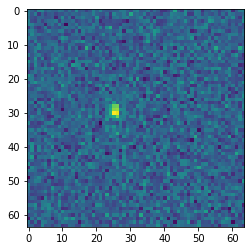

In [61]:
maxima = []
for i in output:
    maxima.append(np.max(output[i]))
    
max_idx = np.where(maxima==np.amax(maxima))[0][0]

plt.imshow(tuple(output.items())[max_idx][1])

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 24.50it/s]


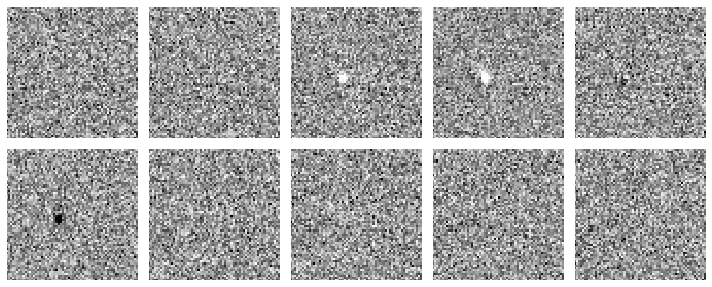

In [15]:
data = output
colormap = 'Greys'
interp = 'none'
nrows = 5
ncols = 2

fig,axs = plt.subplots(ncols, nrows,figsize=(10,10))
axs = axs.ravel()
for i in tqdm(range(len(data))):
    val = list(output[i].values())
    data2 = val[0]
    out_mean = np.mean(data2)
    out_std = np.std(data2)
    col_min = out_mean-(out_std*3)
    col_max = out_mean+(out_std*3)
    #Generate subplots
    axs[i].imshow(data2, clim=(col_min,col_max),cmap=colormap, 
                  interpolation=interp
                 )
    for ax in fig.get_axes():
        ax.set_frame_on(False);
        ax.set_xticklabels('',visible=False);
        ax.set_xticks([]);
        ax.set_yticklabels('',visible=False);
        ax.set_yticks([])
        ax.set_aspect(1.0)
        ax.set_xlim(0,64)
        ax.set_ylim(0,64)
    plt.tight_layout()